In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from classifiers.random_classifier import RandomClassifier
from classifiers.majority_classifier import MajorityClassifier

In [2]:
train_df = pd.read_csv('./seminar_2/train.csv')

In [3]:
train_df.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,3,3.932,3.2512,0,0.0,0,0,0,26.7,2,...,0,0,1,3.076,2.417,0,7.601,0,0,2
1,5,4.236,3.3944,0,0.0,0,0,0,29.4,2,...,0,0,0,3.351,2.405,0,8.003,0,0,2
2,6,4.236,3.4286,0,0.0,0,0,0,28.6,2,...,0,0,0,3.351,2.556,0,7.904,0,0,2
3,7,5.000,5.0476,1,0.0,0,0,0,11.1,0,...,0,0,1,4.712,4.583,0,9.303,0,0,2
4,8,4.525,3.8301,0,0.0,0,0,0,31.6,3,...,0,0,0,3.379,2.143,0,7.950,0,0,2


## Exploration

In [4]:
class_counts = train_df["Class"].value_counts()

In [5]:
print("Class 1: ", class_counts[1], "percentage: ", class_counts[1]/len(train_df))
print("Class 2: ", class_counts[2], "percantage:", class_counts[2]/len(train_df))

Class 1:  564 percentage:  0.6666666666666666
Class 2:  282 percantage: 0.3333333333333333


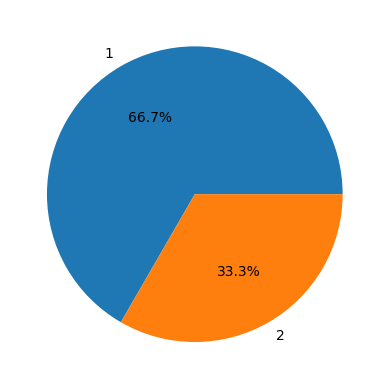

In [6]:
p = plt.pie(x=class_counts, labels=class_counts.index, autopct='%1.1f%%')

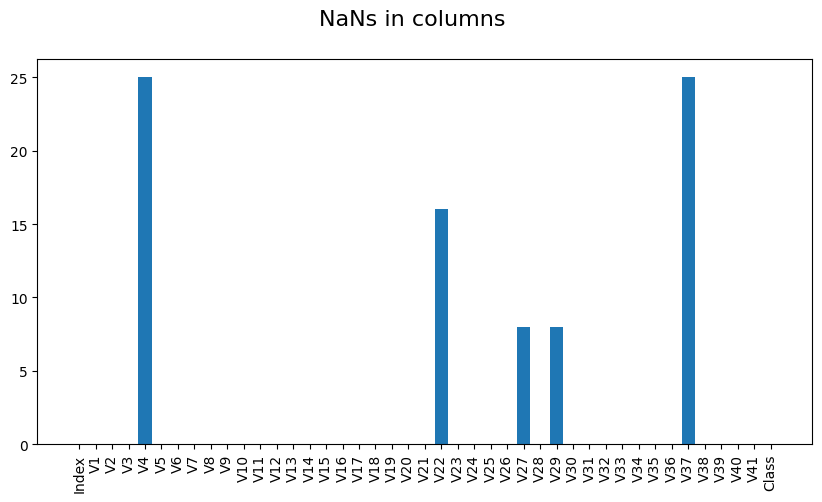

In [7]:
nans = train_df.isnull().sum(axis = 0)

fig = plt.figure(figsize=(10, 5))
fig.suptitle('NaNs in columns', fontsize=16)
plt.bar(nans.index, nans.values)
plt.xticks(rotation=90)
plt.show()

In [8]:
correlation_in_data = train_df.corr()

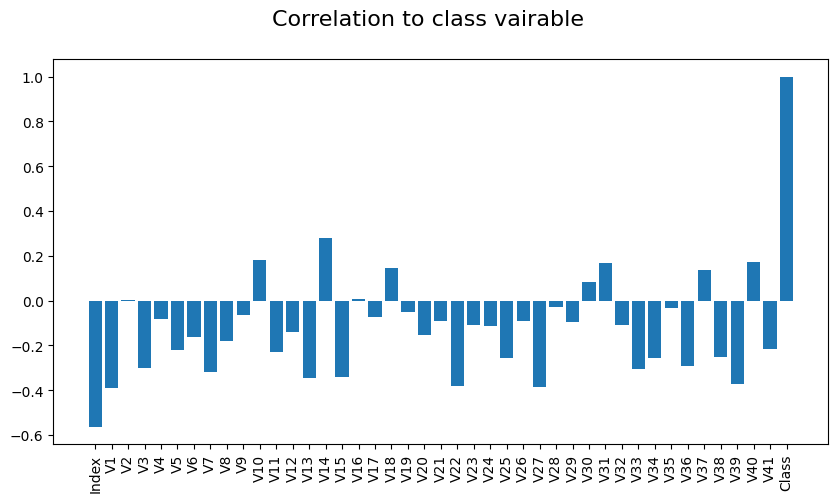

In [9]:
correlation_to_class = correlation_in_data["Class"]

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Correlation to class vairable', fontsize=16)
plt.bar(correlation_to_class.index, correlation_to_class.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: >

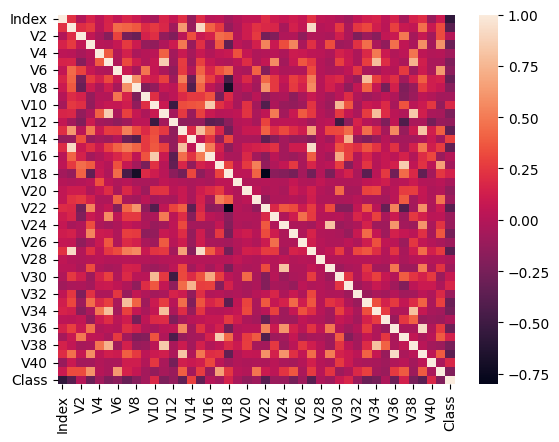

In [10]:
sns.heatmap(correlation_in_data, fmt=".2f")

In [29]:
correlated_columns = set()
threshold = 0.75

for i in range(len(correlation_in_data.columns)):
    for j in range(i):
        if abs(correlation_in_data.iloc[i, j]) > threshold:
            colname1 = correlation_in_data.columns[i]
            colname2 = correlation_in_data.columns[j]
            correlated_columns.add((colname1, colname2, correlation_in_data.iloc[i, j]))

print(correlated_columns)
print(len(correlated_columns), "highly correlated features")

{('V33', 'V7', 0.7858011767376897), ('V38', 'V34', 0.7988417285560266), ('V15', 'V13', 0.791588421036705), ('V11', 'V5', 0.8590175645510726), ('V30', 'V10', 0.7577897873010442), ('V16', 'V10', 0.8439634438135399), ('V34', 'V11', 0.7852915815925773), ('V15', 'V1', 0.90971096205887), ('V34', 'V5', 0.7827712292006271), ('V22', 'V18', -0.8008371258856498), ('V27', 'V15', 0.9230962155600061), ('V37', 'V17', 0.8498222432021918), ('V27', 'V1', 0.921560062534691), ('V38', 'V11', 0.8368979414216005), ('V39', 'V13', 0.8135703600627614), ('V29', 'V24', 0.8046206066746212), ('V39', 'V36', 0.9165966103510599)}
17 highly correlated features


## Modeling

In [26]:
rnd_classifier = RandomClassifier(train_df, "Class")
print([rnd_classifier.classify(None) for _ in range(100)])

[2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2]


In [27]:
majority_classifier = MajorityClassifier(train_df, "Class")
print([majority_classifier.classify(None) for _ in range(100)])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# Logistic regression, Decision tree, SVM

## Evaluation

## Report